In [91]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import seaborn as sns

In [149]:
# File to Load
spotify_data = "spotify-data.csv"
# Read Spotify File and store into Pandas data frame
df = pd.read_csv(spotify_data)

In [150]:
df = df[["artist_name","track_name","streams (millions)","duration_ms", "followers"]]
df

,artist_name,track_name,streams (millions),duration_ms,followers
0,Ed Sheeran,Shape of You,"2,989",233713,88961926
1,The Weeknd,Blinding Lights,"2,673",200040,39308599
2,Tones And I,Dance Monkey,"2,425",209438,2888374
3,Post Malone,rockstar (feat. 21 Savage),"2,312",218147,35093420
4,Lewis Capaldi,Someone You Loved,"2,182",182161,8940823
...,...,...,...,...,...
95,benny blanco,Eastside (with Halsey & Khalid),"1,247",173800,849006
96,Charlie Puth,We Don't Talk Anymore (feat. Selena Gomez),"1,243",217707,14626796
97,Major Lazer,Cold Water (feat. Justin Bieber & MØ),"1,238",185352,6250081
98,OMI,Cheerleader - Felix Jaehn Remix Radio Edit,"1,235",180566,584717


In [151]:
#Convert Duration from milliseconds into Minutes
duration_mins = df.assign(duration_mins = (df["duration_ms"] / 1000) / 60).round(2)
duration_df = pd.merge(df, duration_mins)

In [152]:
#Clean data by removing commas and converting type
duration_df = duration_df.replace(',','', regex = True)
duration_df['streams (millions)'] = duration_df['streams (millions)'].astype(float, errors = 'raise')
duration_df

,artist_name,track_name,streams (millions),duration_ms,followers,duration_mins
0,Ed Sheeran,Shape of You,2989.0,233713,88961926,3.90
1,The Weeknd,Blinding Lights,2673.0,200040,39308599,3.33
2,Tones And I,Dance Monkey,2425.0,209438,2888374,3.49
3,Post Malone,rockstar (feat. 21 Savage),2312.0,218147,35093420,3.64
4,Lewis Capaldi,Someone You Loved,2182.0,182161,8940823,3.04
...,...,...,...,...,...,...
95,benny blanco,Eastside (with Halsey & Khalid),1247.0,173800,849006,2.90
96,Charlie Puth,We Don't Talk Anymore (feat. Selena Gomez),1243.0,217707,14626796,3.63
97,Major Lazer,Cold Water (feat. Justin Bieber & MØ),1238.0,185352,6250081,3.09
98,OMI,Cheerleader - Felix Jaehn Remix Radio Edit,1235.0,180566,584717,3.01


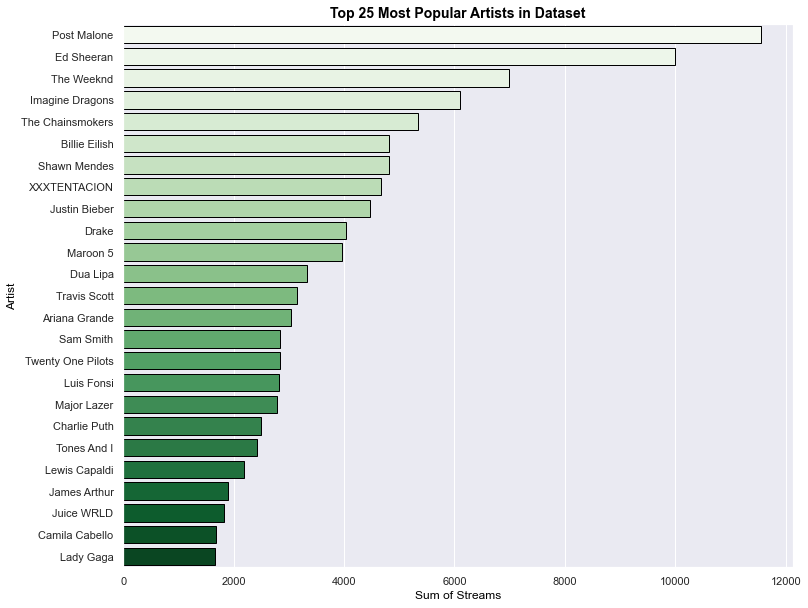

In [173]:
#How many individual artists and who is the most popular
sns.set_theme()
duration_df['artist_name'].nunique()
fig, ax = plt.subplots(figsize = (12, 10))
top_artists = duration_df.groupby('artist_name')['streams (millions)'].sum().sort_values(ascending=False).head(25)
ax = sns.barplot(x=top_artists.values, y=top_artists.index, palette="Greens", orient="h", edgecolor='black', ax=ax)
ax.set_xlabel('Sum of Streams', c='black', fontsize=12)
ax.set_ylabel('Artist', c='black', fontsize=12)
ax.set_title('Top 25 Most Popular Artists in Dataset', c='black', fontsize=14, weight = 'bold')
plt.show()

R squared: 0.0002648381774532412


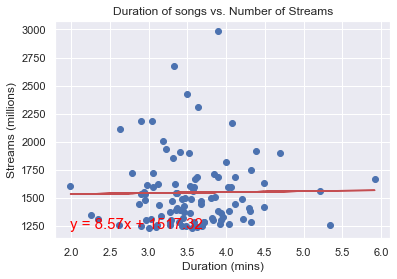

In [139]:
# plot the duration versus the streams and show r-squared value
sns.set_theme()
#  set the values
x_values = duration_df["duration_mins"]
y_values = duration_df["streams (millions)"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.min(),y_values.min()),fontsize=15,color="red")

# Add labels to the plot
plt.xlabel("Duration (mins)")
plt.ylabel("Streams (millions)")
plt.title("Duration of songs vs. Number of Streams")


# Print r square value
print(f"R squared: {rvalue**2}")

plt.show()

In [133]:
#How long is an average song in this dataset
duration_df["duration_mins"].describe()
#An average song in the top 100 is 3.5 minutes long

count    100.000000
mean       3.565100
std        0.609367
min        1.990000
25%        3.175000
50%        3.505000
75%        3.905000
max        5.920000
Name: duration_mins, dtype: float64